**1.Installing the spaCy NLP library for tasks such as tokenization, lemmatization, Named Entity Recognition (NER), and part-of-speech tagging.**

In [25]:
#Install and load spacy
!pip install spacy

**It facilitates lemmatization, stopword removal, and text cleaning for sentiment analysis. I'm choosing the Small Model for its speed and simplicity.**

In [36]:
# Download the en_core_web_sm Model
#This Downloads the English (en_core_web_sm) model, which contains NLP features
#Like Tokenization, POS tagging, and named entity recognition


!python -m spacy download en_core_web_sm

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 12.8/12.8 MB 48.3 MB/s eta 0:00:00
✔ Download and installation successful
You can now load the package via spacy.load('en_core_web_sm')
⚠ Restart to reload dependencies
If you are in a Jupyter or Colab notebook, you may need to restart Python in
order to load all the package's dependencies. You can do this by selecting the
'Restart kernel' or 'Restart runtime' option.


**importing the required tools for process of prepocessing**

In [17]:
#Load the NLP Model
#spacy.load("en_core_web_sm") loads the pre-trained small model into
#memory for processing text
import spacy
#Load the small English NLP Model
nlp = spacy.load("en_core_web_sm")

**uploading the text file of literature review of AI in Healthcare**

In [4]:
from google.colab import files
#it uploads multiple files manually
uploaded_files = files.upload()

Saving A systematic literature review of ai.txt to A systematic literature review of ai.txt


**no. of files uploaded**

In [6]:
import glob
#we use glob.glob() to retrieve all files matching a specific patterns

#Get a list of all text files in the folder

text_files = glob.glob("*.txt")
texts = []
for file_path in text_files:
  with open(file_path, "r",encoding='utf-8') as file:
    texts.append(file.read())

print(f"Loaded {len(texts)} documents")

Loaded 1 documents


**Finding text file**

In [37]:
import glob

# List all text files in the current directory
text_files = glob.glob("*.txt")
print("Found text files:", text_files)


Found text files: ['A systematic literature review of ai.txt']


**Generating Tokens**

In [18]:
tokens_list = []  # Store tokens without printing

for i in texts:
    doc = nlp(i)  # Process each text
    tokens_list.extend([token.text for token in doc])  # Store tokens in a list

# Print total tokens count instead of actual tokens
print(f"Total tokens generated: {len(tokens_list)}")

Total tokens generated: 31798


**After generating all tokens, the tokenization process has also included stopwords and special characters as separate tokens. To refine the text, I will filter out the stopwords using the predefined list in `nlp(i)`.**

In [19]:
# Process the text
tokens_list = []  # Store tokens without stopwords

for i in texts:
    doc = nlp(i)  # Process each text
    tokens_list.extend([token.text for token in doc if not token.is_stop])  # Remove stopwords

# Print the total number of tokens after removing stopwords
print(f"Total tokens after removing stopwords: {len(tokens_list)}")

Total tokens after removing stopwords: 26207


**After removing stopwords we will also do lemmatization process to convert words into their base form.**

In [38]:
# Process the text
lemmatized_tokens = []  # Store lemmatized words

for i in texts:
    doc = nlp(i)  # Process each text
    lemmatized_tokens.extend([token.lemma_ for token in doc if not token.is_stop])  # Lemmatize & remove stopwords

# Print total tokens after lemmatization
print(f"Total tokens after lemmatization: {len(lemmatized_tokens)}")

# Print a sample of first 25 lemmatized words (for verification)
print("Sample lemmatized words:", lemmatized_tokens[:25])

Total tokens after lemmatization: 26207
Sample lemmatized words: ['systematic', 'literature', 'review', 'artificial', 'intelligence', 'healthcare', '\n', 'sector', ':', 'benefit', ',', 'challenge', ',', 'methodology', ',', 'functionality', '\n', 'Omar', 'Alia', ',', '\n', '*', ',', 'Wiem', 'Abdelbakib']


**after doing lemmatization we will now remove the symbols**

In [39]:
lemmatized_tokens = []  # Store cleaned words

for i in texts:
    doc = nlp(i)  # Process each text
    lemmatized_tokens.extend([
        token.lemma_ for token in doc
        if not token.is_stop and token.is_alpha  # Remove stopwords & keep only words (no numbers/symbols)
    ])

# Print total cleaned tokens
print(f"Total cleaned tokens: {len(lemmatized_tokens)}")

# Print a sample of first 25 cleaned lemmatized words
print("Sample cleaned lemmatized words:", lemmatized_tokens[:25])

Total cleaned tokens: 13182
Sample cleaned lemmatized words: ['systematic', 'literature', 'review', 'artificial', 'intelligence', 'healthcare', 'sector', 'benefit', 'challenge', 'methodology', 'functionality', 'Omar', 'Alia', 'Wiem', 'Abdelbakib', 'Anup', 'Shresthac', 'Ersin', 'Elbasib', 'Mohammad', 'Abdallah', 'Ali', 'Alryalatd', 'Yogesh', 'K']


**after removing symbols , we will now do the pos tagging**

In [40]:
# Process the text using spaCy
doc = nlp(" ".join(lemmatized_tokens))

# Extract POS tagging
pos_tags = [(token.text, token.pos_) for token in doc]

# Print first 25 POS tags for checking
print("Sample POS Tags:", pos_tags[:25])


Sample POS Tags: [('systematic', 'ADJ'), ('literature', 'PROPN'), ('review', 'NOUN'), ('artificial', 'ADJ'), ('intelligence', 'NOUN'), ('healthcare', 'NOUN'), ('sector', 'NOUN'), ('benefit', 'NOUN'), ('challenge', 'NOUN'), ('methodology', 'NOUN'), ('functionality', 'NOUN'), ('Omar', 'PROPN'), ('Alia', 'PROPN'), ('Wiem', 'PROPN'), ('Abdelbakib', 'PROPN'), ('Anup', 'PROPN'), ('Shresthac', 'PROPN'), ('Ersin', 'PROPN'), ('Elbasib', 'PROPN'), ('Mohammad', 'PROPN'), ('Abdallah', 'PROPN'), ('Ali', 'PROPN'), ('Alryalatd', 'PROPN'), ('Yogesh', 'PROPN'), ('K', 'PROPN')]


**After the pos tagging , we will do the process of NER for naming the entities as per their place,name,location**

In [41]:
# Extract Named Entities
entities = [(ent.text, ent.label_) for ent in doc.ents]

# Print first 25 named entities
print("Sample Named Entities:", entities[:25])


Sample Named Entities: [('Omar Alia Wiem', 'PERSON'), ('Abdelbakib Anup Shresthac', 'PERSON'), ('Mohammad Abdallah Ali Alryalatd', 'PERSON'), ('Middle East Kuwait', 'LOC'), ('College Engineering American University', 'ORG'), ('University Southern Queensland Toowoomba', 'ORG'), ('Qld Australia', 'PERSON'), ('Al Balqa Applied University', 'ORG'), ('Salt Jordan', 'PERSON'), ('Digital Futures Sustainable Business Society Research Group School Management Swansea University', 'ORG'), ('UK', 'GPE'), ('Department Management Symbiosis Institute Business Management Pune Symbiosis International Deemed University', 'ORG'), ('Maharashtra India', 'ORG'), ('INFO', 'PERSON'), ('August', 'DATE'), ('January', 'DATE'), ('January', 'DATE'), ('AI', 'ORG'), ('AI', 'ORG'), ('AI', 'ORG'), ('AI', 'ORG'), ('AI', 'ORG'), ('aca', 'ORG'), ('AI', 'ORG'), ('AI', 'ORG')]


**After the process of preprocessing , we will now install the required libraries for sentiment analysis**

In [27]:
# Install libraries (if not already installed)
!pip install textblob nltk wordcloud matplotlib seaborn

import nltk
from textblob import TextBlob
from nltk.sentiment import SentimentIntensityAnalyzer
import matplotlib.pyplot as plt
import seaborn as sns
from wordcloud import WordCloud

# Download VADER sentiment analyzer
nltk.download('vader_lexicon')


[nltk_data] Downloading package vader_lexicon to /root/nltk_data...


True

**We will use TextBlob for sentiment analysis for checking polarity and subjectivity score**

In [28]:
# Perform sentiment analysis using TextBlob
text_blob_analysis = TextBlob(" ".join(lemmatized_tokens))

# Get polarity and subjectivity
polarity = text_blob_analysis.sentiment.polarity
subjectivity = text_blob_analysis.sentiment.subjectivity

# Print results
print(f"TextBlob Polarity Score: {polarity}")  # -1 (negative) to +1 (positive)
print(f"TextBlob Subjectivity Score: {subjectivity}")  # 0 (objective) to 1 (subjective)


TextBlob Polarity Score: -0.012392507691908899
TextBlob Subjectivity Score: 0.42250719933996245


**we will aslo use vader for sentiment analysis**

In [29]:
# Initialize VADER Sentiment Analyzer
sia = SentimentIntensityAnalyzer()

# Perform sentiment analysis
vader_sentiment = sia.polarity_scores(" ".join(lemmatized_tokens))

# Print results
print(f"VADER Sentiment Scores: {vader_sentiment}")


VADER Sentiment Scores: {'neg': 0.037, 'neu': 0.834, 'pos': 0.129, 'compound': 1.0}


**We will also do KWIC analysis for better understanding about keywords and their relation**

In [34]:
def kwic_analysis(text, keyword, window=5):
    words = text.split()
    keyword = keyword.lower()

    for i, word in enumerate(words):
        if word.lower() == keyword:
            left_context = " ".join(words[max(0, i-window):i])
            right_context = " ".join(words[i+1:i+window+1])
            print(f"... {left_context} **{word}** {right_context} ...\n")

# Example: Check how "accuracy" is used in the literature review
kwic_analysis(" ".join(lemmatized_tokens), "accuracy")

... continue cantly outperform human term **accuracy** efficiency timely execution medical related ...

... use AI technology help improve **accuracy** practice Zhou et al Mary ...

... term scien tific diligence reliability **accuracy** propriety ensure research concept method ...

... algorithm limited datum yield good **accuracy** realistic applicable Patii Iyer Murray ...

... normal abnormal KNN give high **accuracy** likewise Ribbens et al propose ...

... datum propose algorithm achieve great **accuracy** virtual reality VR game technology ...

... model author claim system achieve **accuracy** Katarya Srinivas approach early diagnosis ...

... algorithm feature selection achieve good **accuracy** Murray et al consider machine ...

... AI continue perform human term **accuracy** efficiency timely execu tion medical ...

... system impede responsiveness AI system **accuracy** data analysis potentially compromise patient ...



**now we will count the frequency of most common words used in the review**

In [35]:
from collections import Counter

# Count word frequencies
word_freq = Counter(lemmatized_tokens)

# Print the 10 most common words
print(word_freq.most_common(10))


[('et', 662), ('al', 662), ('AI', 233), ('datum', 158), ('healthcare', 128), ('health', 119), ('review', 112), ('patient', 106), ('research', 96), ('medical', 92)]


Here we will plot the sentiment analysis scores

<ipython-input-31-61988cee2dd9>:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=list(vader_sentiment.keys()), y=list(vader_sentiment.values()), palette="coolwarm")


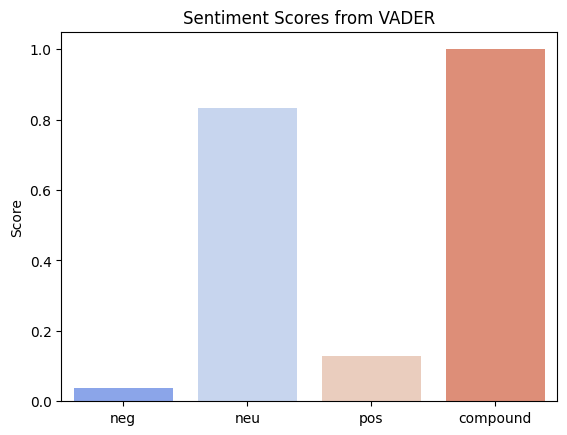

In [31]:
# Plot sentiment scores using Seaborn
sns.barplot(x=list(vader_sentiment.keys()), y=list(vader_sentiment.values()), palette="coolwarm")
plt.title("Sentiment Scores from VADER")
plt.ylabel("Score")
plt.show()


**We will also create a pie chart of the data for better visual understanding**

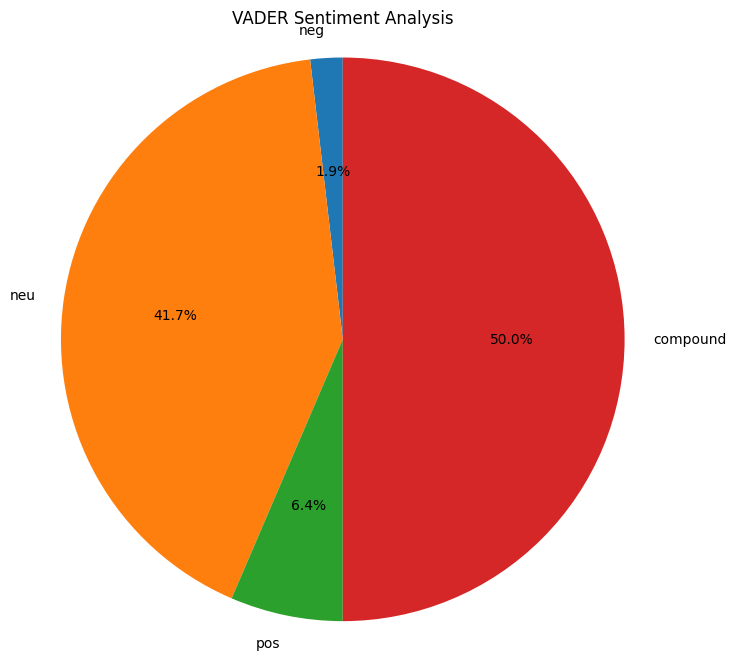

In [32]:
# creating a piechart for this data

# Assuming vader_sentiment is a dictionary from the previous code
# Example: vader_sentiment = {'neg': 0.1, 'neu': 0.6, 'pos': 0.3, 'compound': 0.5}

labels = list(vader_sentiment.keys())
sizes = list(vader_sentiment.values())

plt.figure(figsize=(8, 8))
plt.pie(sizes, labels=labels, autopct='%1.1f%%', startangle=90)
plt.title('VADER Sentiment Analysis')
plt.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.
plt.show()


**Now we will generate word cloud for better unserstanding**

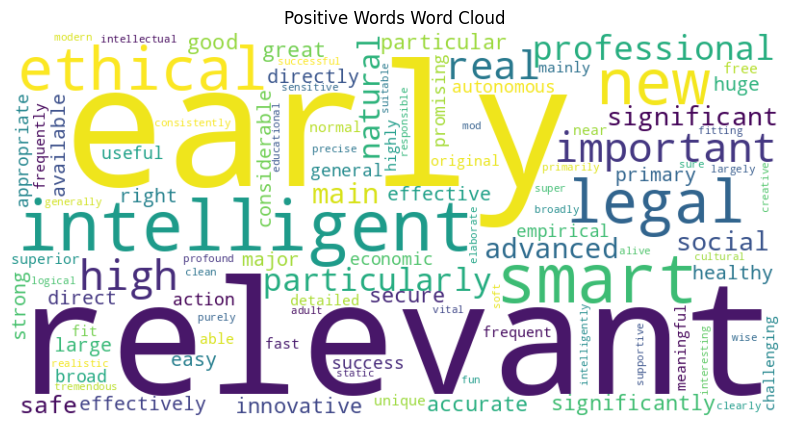

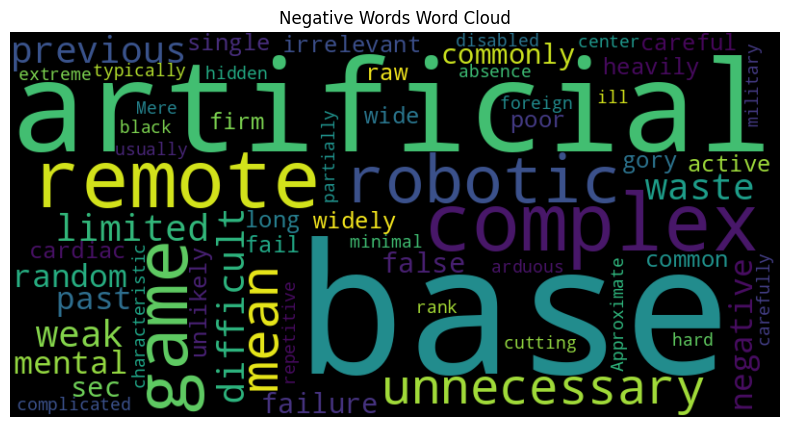

In [33]:
# Generate Word Cloud for positive words
positive_words = " ".join([word for word in lemmatized_tokens if TextBlob(word).sentiment.polarity > 0])

wordcloud = WordCloud(width=800, height=400, background_color="white").generate(positive_words)
plt.figure(figsize=(10, 5))
plt.imshow(wordcloud, interpolation="bilinear")
plt.axis("off")
plt.title("Positive Words Word Cloud")
plt.show()

# Generate Word Cloud for negative words
negative_words = " ".join([word for word in lemmatized_tokens if TextBlob(word).sentiment.polarity < 0])

wordcloud = WordCloud(width=800, height=400, background_color="black").generate(negative_words)
plt.figure(figsize=(10, 5))
plt.imshow(wordcloud, interpolation="bilinear")
plt.axis("off")
plt.title("Negative Words Word Cloud")
plt.show()
